# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/theme01/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [27]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['YEARS_BIRTH_CUT'] = pd.qcut(app_train['YEARS_BIRTH'], 5)
app_train['AMT_INCOME_TOTAL_QCUT'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)

In [17]:
app_train.groupby(['YEARS_BIRTH_CUT', 'AMT_INCOME_TOTAL_QCUT']).size()

YEARS_BIRTH_CUT   AMT_INCOME_TOTAL_QCUT  
(20.517, 32.038]  (25649.999, 99000.0]       11871
                  (99000.0, 135000.0]        19123
                  (135000.0, 162000.0]        7670
                  (162000.0, 225000.0]       14941
                  (225000.0, 117000000.0]     7907
(32.038, 39.496]  (25649.999, 99000.0]       10242
                  (99000.0, 135000.0]        16640
                  (135000.0, 162000.0]        7237
                  (162000.0, 225000.0]       16429
                  (225000.0, 117000000.0]    10956
(39.496, 47.178]  (25649.999, 99000.0]       10214
                  (99000.0, 135000.0]        16072
                  (135000.0, 162000.0]        6917
                  (162000.0, 225000.0]       16704
                  (225000.0, 117000000.0]    11602
(47.178, 56.093]  (25649.999, 99000.0]       12194
                  (99000.0, 135000.0]        16700
                  (135000.0, 162000.0]        6977
                  (162000.0, 225000.0]  

In [28]:
ser = app_train.groupby('AMT_INCOME_TOTAL_QCUT').apply(lambda df: (df['TARGET'] == 1).sum())
data_grouped = pd.DataFrame(ser, columns=['CNT_DEFAULT'])
data_grouped['CNT'] = app_train.groupby('AMT_INCOME_TOTAL_QCUT').size()

In [31]:
data_grouped['DERAULT_PERCENTAGE'] = data_grouped['CNT_DEFAULT'] / data_grouped['CNT'] * 100
data_grouped

,CNT_DEFAULT,CNT,DERAULT_RATIO,DERAULT_PERCENTAGE
AMT_INCOME_TOTAL_QCUT,,,,
"(25649.999, 81000.0]",2735,33391,8.190830,8.190830
"(81000.0, 99000.0]",2490,30280,8.223250,8.223250
"(99000.0, 112500.0]",3218,36907,8.719213,8.719213
"(112500.0, 135000.0]",4147,48849,8.489427,8.489427
"(135000.0, 147150.0]",390,4333,9.000692,9.000692
"(147150.0, 162000.0]",2689,31120,8.640746,8.640746
"(162000.0, 180000.0]",2586,30704,8.422355,8.422355
"(180000.0, 225000.0]",3498,44809,7.806467,7.806467
"(225000.0, 270000.0]",1405,19957,7.040136,7.040136


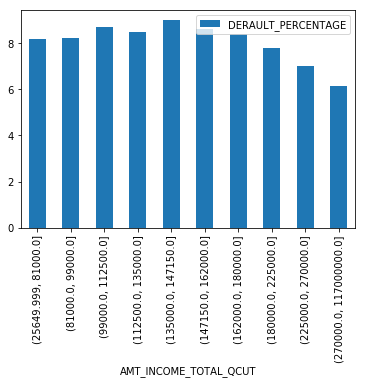

In [35]:
data_grouped.plot.bar(y='DERAULT_PERCENTAGE')